### Practical 10 Write the program to extract image features by implementing methods like corner and blob detectors, HoG and Haar features

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('lenna_original.jpg')

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04) #Harris corner
blobs = cv2.SimpleBlobDetector_create().detect(img) #DOG
hog = cv2.HOGDescriptor()
hog_features = hog.compute(img)  #HOG
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #HAAR face Detection
faces = haar.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

In [11]:
for corner in np.argwhere(corners > 0.01 * corners.max()):
    cv2.circle(img, tuple(corner[::-1]), radius=3, color=(0, 255, 0), thickness=2)

for blob in blobs:
    x, y = blob.pt
    size = blob.size
    cv2.circle(img, (int(x), int(y)), int(size), (0, 0, 255), thickness=2)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), thickness=2)

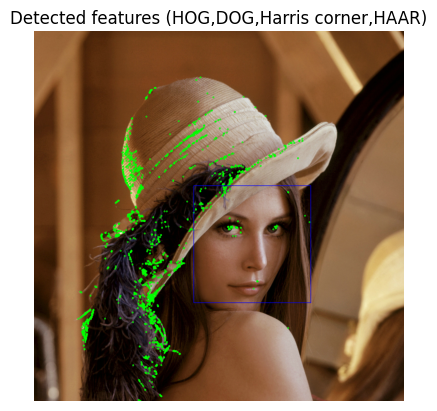

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected features (HOG,DOG,Harris corner,HAAR)')
plt.axis('off')

plt.show()